### When it's useful
1.Last interaction : When sales cycle does not involve a consideration phase

2.Position_based   : When you value touchpoints that introduced customers and resulted in sales

3.Linear           : When your ads are designed to maintain contact throught entire cycle

4.First interaction: When you are starting off/want to create initial awareness

5.Last non-direct  : When you want to filter out direct traffic

## Read data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('attribution_allocation_student_data.csv')

In [3]:
df.head()

,convert_TF,touch_1,touch_2,touch_3,touch_4,touch_5,tier
0,True,email,direct,social,NaN,NaN,1
1,True,social,direct,organic_search,NaN,NaN,1
2,True,organic_search,display,social,NaN,NaN,1
3,True,social,direct,NaN,NaN,NaN,1
4,True,social,display,direct,NaN,NaN,1


In [4]:
df.convert_TF.value_counts()

False    216034
True       2378
Name: convert_TF, dtype: int64

In [5]:
df_True = df[df.convert_TF == True]

In [6]:
spending = pd.read_csv('channel_spend_student_data.csv')

In [7]:
pd.set_option('display.max_colwidth', -1)

C:\Users\hahas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [8]:
spending

,tier,spend by channel
0,1,"{'social': 50, 'organic_search': 0, 'referral': 50, 'email': 50, 'paid_search': 50, 'display': 50, 'direct': 0}"
1,2,"{'social': 100, 'organic_search': 0, 'referral': 100, 'email': 100, 'paid_search': 100, 'display': 100, 'direct': 0}"
2,3,"{'social': 150, 'organic_search': 0, 'referral': 150, 'email': 150, 'paid_search': 150, 'display': 150, 'direct': 0}"
3,total,"{'social': 300, 'organic_search': 0, 'referral': 300, 'email': 300, 'paid_search': 300, 'display': 300, 'direct': 0}"


## Attribution: Allocate conversions by channel

### Calculate CAC for each of the channels

### (Method1) Last interaction

In [9]:
from collections import defaultdict
dic1 = defaultdict(list)

for k in list(range(1,4)):    
    dic2 = defaultdict(int)
    for i, row in df_True[df_True.tier == k].iterrows():
        if pd.isnull(row.touch_5) != True:
            dic2[row.touch_5] += 1 
        elif pd.isnull(row.touch_5) == True:
            if pd.isnull(row.touch_4) != True:
                dic2[row.touch_4] += 1
            elif pd.isnull(row.touch_4) == True:
                if pd.isnull(row.touch_3) != True:
                    dic2[row.touch_3] += 1
                elif pd.isnull(row.touch_3) == True:
                    if pd.isnull(row.touch_2) != True:
                        dic2[row.touch_2] += 1
                    elif pd.isnull(row.touch_2) == True:
                        if pd.isnull(row.touch_1) != True:
                            dic2[row.touch_1] += 1
    dic1[k].append(dic2)

In [10]:
dic1

defaultdict(list,
            {1: [defaultdict(int,
                          {'social': 58,
                           'organic_search': 121,
                           'direct': 122,
                           'display': 72,
                           'email': 65,
                           'paid_search': 2,
                           'referral': 1})],
             2: [defaultdict(int,
                          {'direct': 197,
                           'social': 129,
                           'organic_search': 223,
                           'display': 159,
                           'email': 99,
                           'referral': 2,
                           'paid_search': 2})],
             3: [defaultdict(int,
                          {'direct': 294,
                           'display': 175,
                           'social': 165,
                           'organic_search': 318,
                           'email': 159,
                           'paid_search': 8,
     

In [11]:
# Calculate total number of converions by channel 
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier]
        print(tier + "_conversions = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier]
        print(tier + "_conversions = "+ str(round(CAC,2)))

social_conversions = 352
organic_search_conversions = 662
email_conversions = 323
display_conversions = 406
direct_conversions = 613
referral_conversions = 10
paid_search_conversions = 12


In [12]:
# Calculate CACs by channel 
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  300 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = 0 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))

social_CAC = 0.85
organic_search_CAC = 0.0
email_CAC = 0.93
display_CAC = 0.74
direct_CAC = 0.0
referral_CAC = 30.0
paid_search_CAC = 25.0


### (Method2) Position Based

In [13]:
from collections import defaultdict
dic1 = defaultdict(list)

for k in list(range(1,4)):
    dic2 = defaultdict(int)
    for i, row in df_True[df_True.tier == k].iterrows():
        if pd.isnull(row.touch_5) != True:
            dic2[row.touch_1] += 0.4
            dic2[row.touch_2] += 0.2/3
            dic2[row.touch_3] += 0.2/3
            dic2[row.touch_4] += 0.2/3
            dic2[row.touch_5] += 0.4
        elif pd.isnull(row.touch_5) == True:
            if pd.isnull(row.touch_4) != True:
                dic2[row.touch_1] += 0.4
                dic2[row.touch_2] += 0.2/2
                dic2[row.touch_3] += 0.2/2
                dic2[row.touch_4] += 0.4
            elif pd.isnull(row.touch_4) == True:
                if pd.isnull(row.touch_3) != True:
                    dic2[row.touch_1] += 0.4
                    dic2[row.touch_2] += 0.2
                    dic2[row.touch_3] += 0.4
                elif pd.isnull(row.touch_3) == True:
                    if pd.isnull(row.touch_2) != True:
                        dic2[row.touch_1] += .5
                        dic2[row.touch_2] += .5
                    elif pd.isnull(row.touch_2) == True:
                        if pd.isnull(row.touch_1) != True:
                            dic2[row.touch_1] += 1
    dic1[k].append(dic2)          

In [14]:
dic1

defaultdict(list,
            {1: [defaultdict(int,
                          {'email': 64.53333333333333,
                           'direct': 105.70000000000013,
                           'social': 65.83333333333336,
                           'organic_search': 118.10000000000032,
                           'display': 83.40000000000012,
                           'referral': 1.4,
                           'paid_search': 2.033333333333333})],
             2: [defaultdict(int,
                          {'organic_search': 226.7666666666671,
                           'display': 158.30000000000044,
                           'social': 126.23333333333368,
                           'email': 110.73333333333366,
                           'direct': 183.6000000000003,
                           'paid_search': 3.2666666666666666,
                           'referral': 2.1})],
             3: [defaultdict(int,
                          {'social': 157.23333333333372,
                         

In [15]:
# Calculate total number of converions by channel 
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier]
        print(tier + "_conversions = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier]
        print(tier + "_conversions = "+ str(round(CAC,2)))

social_conversions = 349.3
organic_search_conversions = 669.03
email_conversions = 340.57
display_conversions = 416.7
direct_conversions = 580.87
referral_conversions = 10.3
paid_search_conversions = 11.23


In [16]:
# Calculate CACs by channel 
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  300 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = 0 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))

social_CAC = 0.86
organic_search_CAC = 0.0
email_CAC = 0.88
display_CAC = 0.72
direct_CAC = 0.0
referral_CAC = 29.13
paid_search_CAC = 26.71


### (Method3) Linear

In [17]:
from collections import defaultdict
dic1 = defaultdict(list)

for k in list(range(1,4)):
    dic2 = defaultdict(int)
    for i, row in df_True[df_True.tier == k].iterrows():
        if pd.isnull(row.touch_5) != True:
            dic2[row.touch_1] += 1/5
            dic2[row.touch_2] += 1/5
            dic2[row.touch_3] += 1/5
            dic2[row.touch_4] += 1/5
            dic2[row.touch_5] += 1/5
        if pd.isnull(row.touch_5) == True:
            if pd.isnull(row.touch_4) != True:
                dic2[row.touch_1] += 1/4
                dic2[row.touch_2] += 1/4
                dic2[row.touch_3] += 1/4
                dic2[row.touch_4] += 1/4
            if pd.isnull(row.touch_4) == True:
                if pd.isnull(row.touch_3) != True:
                    dic2[row.touch_1] += 1/3
                    dic2[row.touch_2] += 1/3
                    dic2[row.touch_3] += 1/3
                if pd.isnull(row.touch_3) == True:
                    if pd.isnull(row.touch_2) != True:
                        dic2[row.touch_1] += .5
                        dic2[row.touch_2] += .5
                    if pd.isnull(row.touch_2) == True:
                        if pd.isnull(row.touch_1) != True:
                            dic2[row.touch_1] += 1
    dic1[k].append(dic2)   

In [18]:
dic1

defaultdict(list,
            {1: [defaultdict(int,
                          {'email': 62.71666666666676,
                           'direct': 102.66666666666664,
                           'social': 68.58333333333346,
                           'organic_search': 117.63333333333317,
                           'display': 85.91666666666664,
                           'referral': 1.3333333333333333,
                           'paid_search': 2.15})],
             2: [defaultdict(int,
                          {'organic_search': 225.28333333333356,
                           'display': 153.86666666666653,
                           'social': 129.1166666666666,
                           'email': 111.9166666666666,
                           'direct': 185.03333333333353,
                           'paid_search': 3.066666666666667,
                           'referral': 2.716666666666667})],
             3: [defaultdict(int,
                          {'social': 155.46666666666667,
          

In [19]:
# Calculate total number of converions by channel 
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier]
        print(tier + "_conversions = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier]
        print(tier + "_conversions = "+ str(round(CAC,2)))

social_conversions = 353.17
organic_search_conversions = 667.33
email_conversions = 337.62
display_conversions = 416.67
direct_conversions = 582.37
referral_conversions = 10.28
paid_search_conversions = 10.57


In [20]:
# Calculate CACs by channel 
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  300 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = 0 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))

social_CAC = 0.85
organic_search_CAC = 0.0
email_CAC = 0.89
display_CAC = 0.72
direct_CAC = 0.0
referral_CAC = 29.17
paid_search_CAC = 28.39


### (Method4) First interaction

In [21]:
from collections import defaultdict
dic1 = defaultdict(list)

for k in list(range(1,4)):
    dic2 = defaultdict(int)
    for i, row in df_True[df_True.tier == k].iterrows():
        if pd.isnull(row.touch_1) != True:
            dic2[row.touch_1] += 1
    dic1[k].append(dic2)   

In [22]:
dic1

defaultdict(list,
            {1: [defaultdict(int,
                          {'email': 67,
                           'social': 71,
                           'organic_search': 113,
                           'direct': 94,
                           'display': 92,
                           'paid_search': 2,
                           'referral': 2})],
             2: [defaultdict(int,
                          {'organic_search': 233,
                           'social': 118,
                           'direct': 171,
                           'email': 116,
                           'display': 167,
                           'paid_search': 5,
                           'referral': 1})],
             3: [defaultdict(int,
                          {'social': 151,
                           'email': 174,
                           'direct': 285,
                           'display': 175,
                           'organic_search': 329,
                           'referral': 7,
        

In [23]:
# Calculate total number of converions by channel 
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier]
        print(tier + "_conversions = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier]
        print(tier + "_conversions = "+ str(round(CAC,2)))

social_conversions = 340
organic_search_conversions = 675
email_conversions = 357
display_conversions = 434
direct_conversions = 550
referral_conversions = 10
paid_search_conversions = 12


In [24]:
# Calculate CACs by channel 
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  300 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = 0 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))

social_CAC = 0.88
organic_search_CAC = 0.0
email_CAC = 0.84
display_CAC = 0.69
direct_CAC = 0.0
referral_CAC = 30.0
paid_search_CAC = 25.0


### (Method5) Last non-direct interaction

In [25]:
from collections import defaultdict
dic1 = defaultdict(list)

for k in list(range(1,4)):    
    dic2 = defaultdict(int)
    for i, row in df_True[df_True.tier == k].iterrows():
        if pd.isnull(row.touch_5) != True and row.touch_5 != 'direct':
            dic2[row.touch_5] += 1 
        elif (row.touch_5 == 'direct') or (pd.isnull(row.touch_5) == True):
            if pd.isnull(row.touch_4) != True and row.touch_4 != 'direct':
                dic2[row.touch_4] += 1
            elif (row.touch_4 == 'direct') or (pd.isnull(row.touch_4) == True):
                if pd.isnull(row.touch_3) != True and row.touch_3 != 'direct':
                    dic2[row.touch_3] += 1
                elif (row.touch_3 == 'direct') or (pd.isnull(row.touch_3) == True):
                    if pd.isnull(row.touch_2) != True and row.touch_2 != 'direct':
                        dic2[row.touch_2] += 1
                    elif (row.touch_2 == 'direct') or (pd.isnull(row.touch_2) == True):
                        if pd.isnull(row.touch_1) != True and row.touch_1 != 'direct':
                            dic2[row.touch_1] += 1
                        else:
                            dic2[row.touch_1] += 1
    dic1[k].append(dic2)

In [26]:
dic1

defaultdict(list,
            {1: [defaultdict(int,
                          {'social': 83,
                           'organic_search': 163,
                           'display': 100,
                           'email': 80,
                           'referral': 2,
                           'paid_search': 3,
                           'direct': 10})],
             2: [defaultdict(int,
                          {'email': 130,
                           'organic_search': 298,
                           'social': 166,
                           'display': 199,
                           'referral': 4,
                           'direct': 12,
                           'paid_search': 2})],
             3: [defaultdict(int,
                          {'display': 226,
                           'social': 205,
                           'organic_search': 435,
                           'email': 216,
                           'paid_search': 9,
                           'referral': 8,
     

In [27]:
# Calculate total number of converions by channel 
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier]
        print(tier + "_conversions = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier]
        print(tier + "_conversions = "+ str(round(CAC,2)))

social_conversions = 454
organic_search_conversions = 896
email_conversions = 426
display_conversions = 525
direct_conversions = 49
referral_conversions = 14
paid_search_conversions = 14


In [28]:
# Calculate CACs by channel 
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  300 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = 0 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))

social_CAC = 0.66
organic_search_CAC = 0.0
email_CAC = 0.7
display_CAC = 0.57
direct_CAC = 0.0
referral_CAC = 21.43
paid_search_CAC = 21.43


# Visualization

In [29]:
import seaborn as sns

In [30]:
viz_dt = {'social_CAC':[.85,.86,.85,.88,.66],
         'organic_search_CAC':[0,0,0,0,0],
         'email_CAC':[.93,0.88,.89,.84,.7],
         'display_CAC':[.74,.72,.72,.69,.57],
         'direct_CAC':[0,0,0,0,0],
         'referral_CAC':[30.0,29.13,29.17,30.0,21.43],
         'paid_search_CAC':[25.0,26.71,28.39,25.0,21.43]}

viz= pd.DataFrame(viz_dt, index=['Last interaction','Position_based','Linear','First interaction','Last non-direct interaction'])

viz

,social_CAC,organic_search_CAC,email_CAC,display_CAC,direct_CAC,referral_CAC,paid_search_CAC
Last interaction,0.85,0,0.93,0.74,0,30.00,25.00
Position_based,0.86,0,0.88,0.72,0,29.13,26.71
Linear,0.85,0,0.89,0.72,0,29.17,28.39
First interaction,0.88,0,0.84,0.69,0,30.00,25.00
Last non-direct interaction,0.66,0,0.70,0.57,0,21.43,21.43


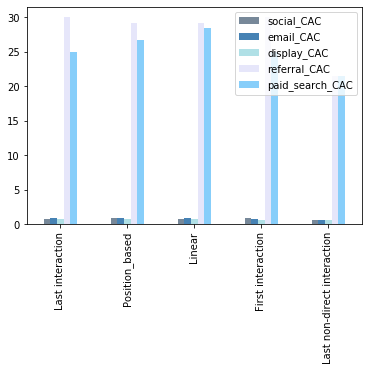

In [32]:
# plotting average CAC by attribution method
viz[['social_CAC','email_CAC', 'display_CAC', 'referral_CAC', 'paid_search_CAC']].plot(kind='bar',color=['lightslategray','steelblue','powderblue', 'lavender', 'lightskyblue']);

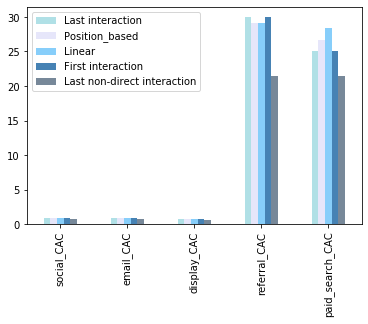

In [33]:
# plotting average CAC by channel
viz[['social_CAC', 'email_CAC','display_CAC','referral_CAC', 'paid_search_CAC']].T.plot(kind='bar',color=['powderblue', 'lavender', 'lightskyblue', 'steelblue', 'lightslategray']);

## Allocation

### We chose 'last non-direct interation' method

In [34]:
# calculate the marginal CAC by spending tier by channel

df_channels = pd.DataFrame()
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['organic_search','direct']:
        data = {'Cumulative spend':[50,100,150],
           'Cumulative number of conversions':[dic1[1][0][tier],dic1[2][0][tier],dic1[3][0][tier]],
           'Average CAC':[50/dic1[1][0][tier], 100/(dic1[2][0][tier]), 150/(dic1[3][0][tier])],
           'Marginal spend':[50,50,50],
           'Marginal conversions':[dic1[1][0][tier],dic1[2][0][tier]-dic1[1][0][tier],dic1[3][0][tier]-dic1[2][0][tier]],
           'Marginal CAC':[50/(dic1[1][0][tier]), 50/(dic1[2][0][tier]-dic1[1][0][tier]), 50/(dic1[3][0][tier]-dic1[2][0][tier])],
               'Channel':tier}
    elif tier in ['organic_search','direct']:
            data = {'Cumulative spend':[0,0,0],
           'Cumulative number of conversions':[dic1[1][0][tier],dic1[2][0][tier],dic1[3][0][tier]],
           'Average CAC':[0/dic1[1][0][tier], 0/(dic1[2][0][tier]), 0/dic1[3][0][tier]],
           'Marginal spend':[0,0,0],
           'Marginal conversions':[dic1[1][0][tier],dic1[2][0][tier]-dic1[1][0][tier],dic1[3][0][tier]-dic1[2][0][tier]],
           'Marginal CAC':[0/(dic1[1][0][tier]), 0/(dic1[2][0][tier]-dic1[1][0][tier]), 0/(dic1[3][0][tier]-dic1[2][0][tier])],
               'Channel':tier}

    df_channel = pd.DataFrame(data, index =['tier1','tier2','tier3'])
    df_channels = pd.concat([df_channels, df_channel])

In [35]:
df_channels

,Cumulative spend,Cumulative number of conversions,Average CAC,Marginal spend,Marginal conversions,Marginal CAC,Channel
tier1,50,83,0.602410,50,83,0.602410,social
tier2,100,166,0.602410,50,83,0.602410,social
tier3,150,205,0.731707,50,39,1.282051,social
tier1,0,163,0.000000,0,163,0.000000,organic_search
tier2,0,298,0.000000,0,135,0.000000,organic_search
tier3,0,435,0.000000,0,137,0.000000,organic_search
tier1,50,80,0.625000,50,80,0.625000,email
tier2,100,130,0.769231,50,50,1.000000,email
tier3,150,216,0.694444,50,86,0.581395,email
tier1,50,100,0.500000,50,100,0.500000,display


In [36]:
# create a pivot table (CAC)

Marginal_CAC_table = pd.pivot_table(df_channels, index=df_channels.index, columns='Channel', values='Marginal CAC')
Marginal_CAC_table

Channel,direct,display,email,organic_search,paid_search,referral,social
tier1,0.0,0.500000,0.625000,0.0,16.666667,25.0,0.602410
tier2,0.0,0.505051,1.000000,0.0,-50.000000,25.0,0.602410
tier3,0.0,1.851852,0.581395,0.0,7.142857,12.5,1.282051


In [37]:
# create a pivot table (# of converions)

Number_of_conversions = pd.DataFrame(50/Marginal_CAC_table.iloc[0])
Number_of_conversions = Number_of_conversions.join(50/Marginal_CAC_table.iloc[1])
Number_of_conversions = Number_of_conversions.join(50/Marginal_CAC_table.iloc[2])
Number_of_conversions = Number_of_conversions.T
round(Number_of_conversions,0)

Channel,direct,display,email,organic_search,paid_search,referral,social
tier1,inf,100.0,80.0,inf,3.0,2.0,83.0
tier2,inf,99.0,50.0,inf,-1.0,2.0,83.0
tier3,inf,27.0,86.0,inf,7.0,4.0,39.0
